# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [76]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

In [77]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [78]:
## load dataset here
df = pd.read_csv(r"C:\Users\levob\VSCODE\minipro\NMMH-4CE\icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [79]:
df.shape

(35887, 2)

The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [80]:
df1 = df.copy()

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


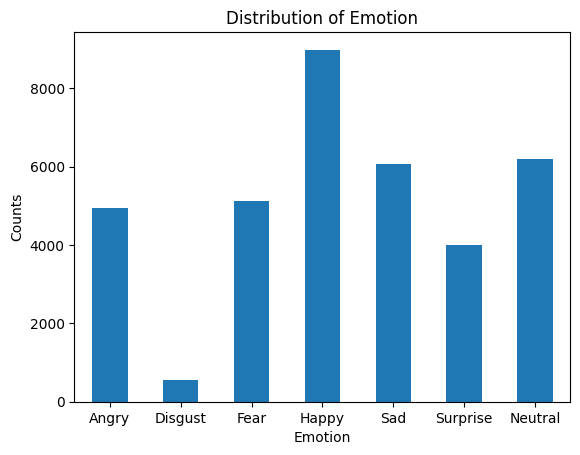

In [82]:
# storing emotion labels
label_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# calculating target distribution
td = df1["emotion"].value_counts().sort_index()

# plotting
td.plot(kind='bar')
plt.title('Distribution of Emotion')
plt.xlabel('Emotion')
plt.ylabel('Counts')
plt.xticks(ticks=range(len(label_names)), labels=label_names, rotation=0)
plt.show()

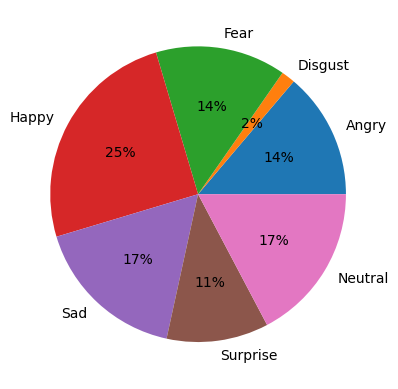

In [83]:
fig, ax = plt.subplots()
ax.pie(td, labels=label_names, autopct='%.0f%%')
plt.show()

In [84]:
## parsing data here
images, labels = parse_data(df1)


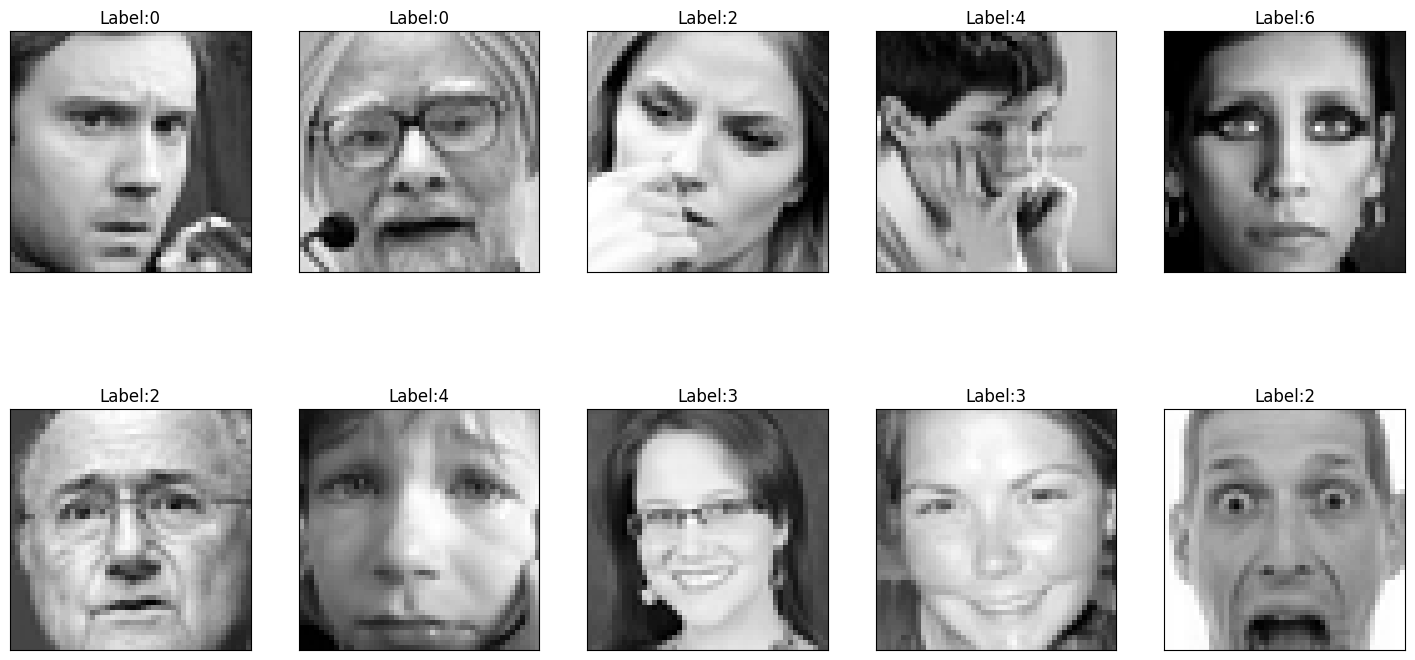

In [85]:
## showing images here
show_img(images, labels)

In [86]:
labels

array([0, 0, 2, ..., 0, 3, 2])

In [87]:
def show_img_label(images: np.ndarray, labels: np.ndarray, target_label: int = 0):
    # Filter images and labels based on the target label
    target_images = images[labels == target_label]
    target_labels = labels[labels == target_label]
    
    # Limit the number of images to 5 for display
    num_images = min(len(target_images), 5)
    
    _, axarr = plt.subplots(nrows=1, ncols=5, figsize=(18, 9))
    axarr = axarr.flatten()
    
    for idx in range(num_images):
        axarr[idx].imshow(target_images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(target_labels[idx]))
    
    # Hide any remaining subplots
    for idx in range(num_images, len(axarr)):
        axarr[idx].axis('off')
    
    plt.show()

* Status: Angry

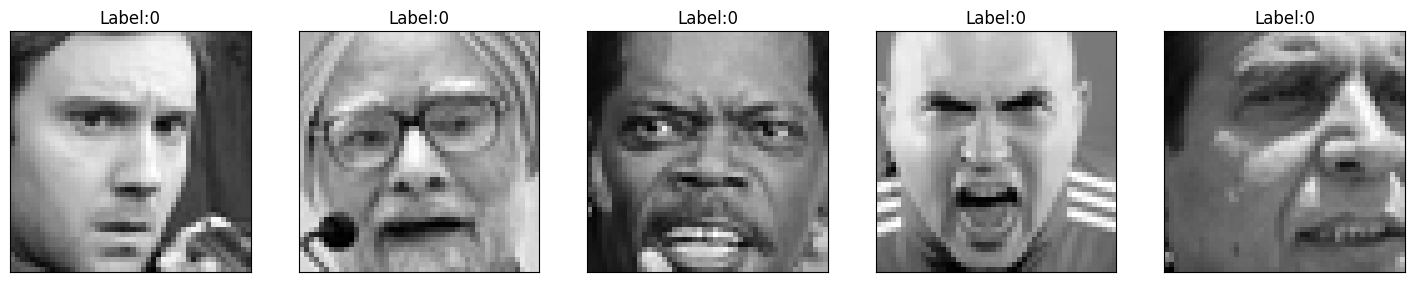

In [88]:
show_img_label(images, labels, target_label=0)

* Status: Disgust

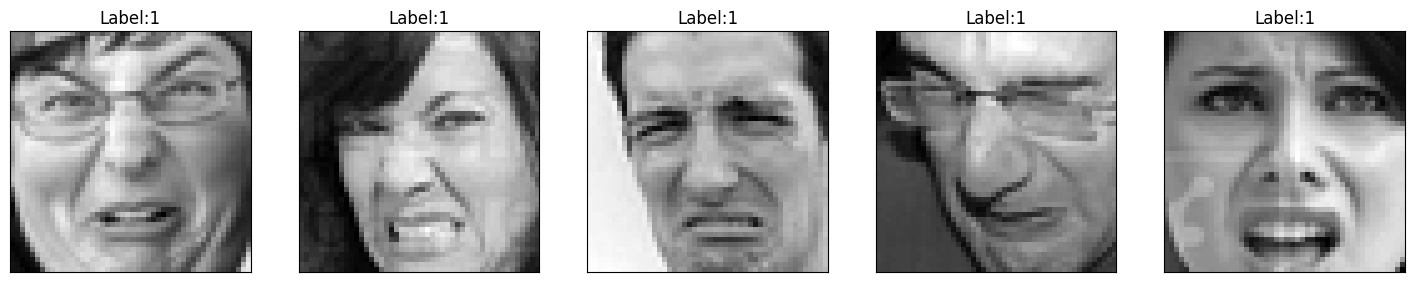

In [89]:
show_img_label(images, labels, target_label=1)

* Status: Fear

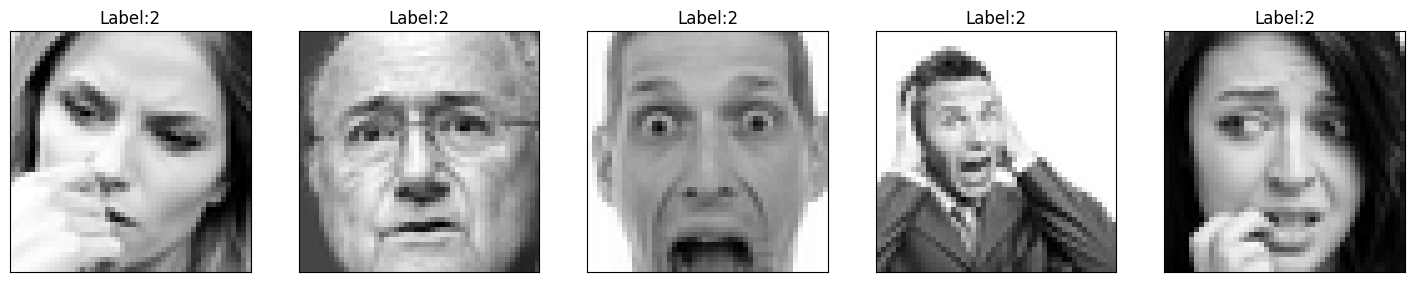

In [90]:
show_img_label(images, labels, target_label=2)

* Status: Happy

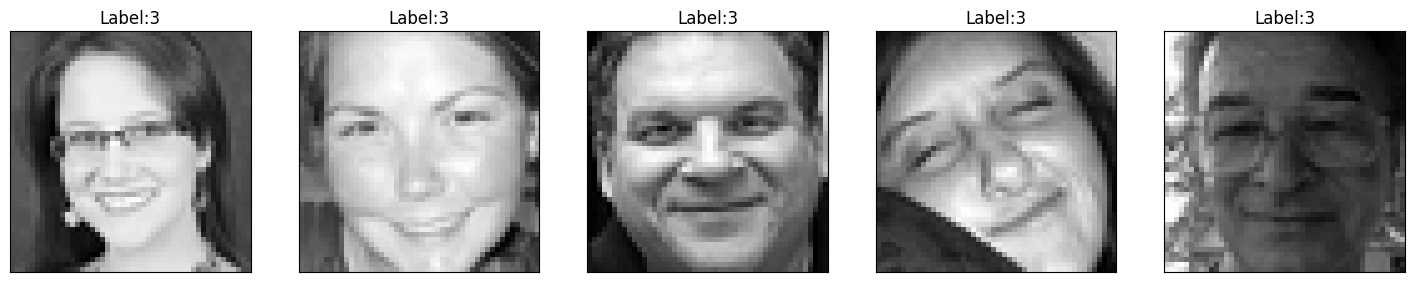

In [91]:
show_img_label(images, labels, target_label=3)

* Status: Sad

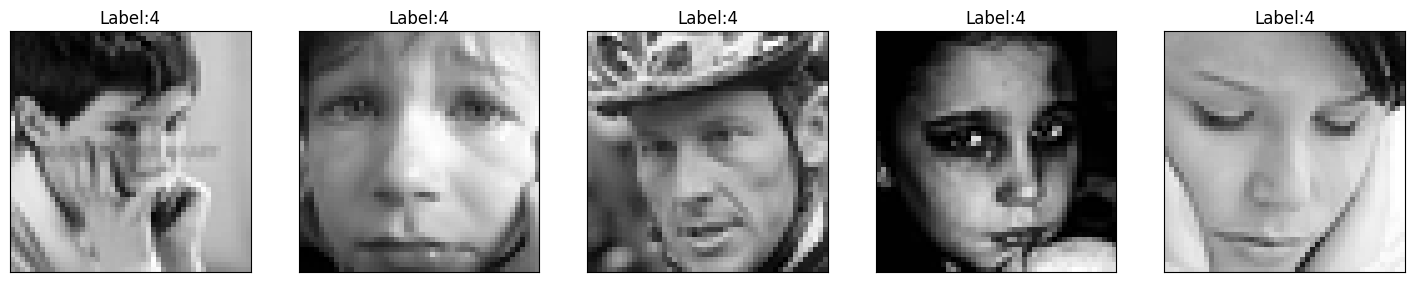

In [92]:
show_img_label(images, labels, target_label=4)

* Status: Surprise

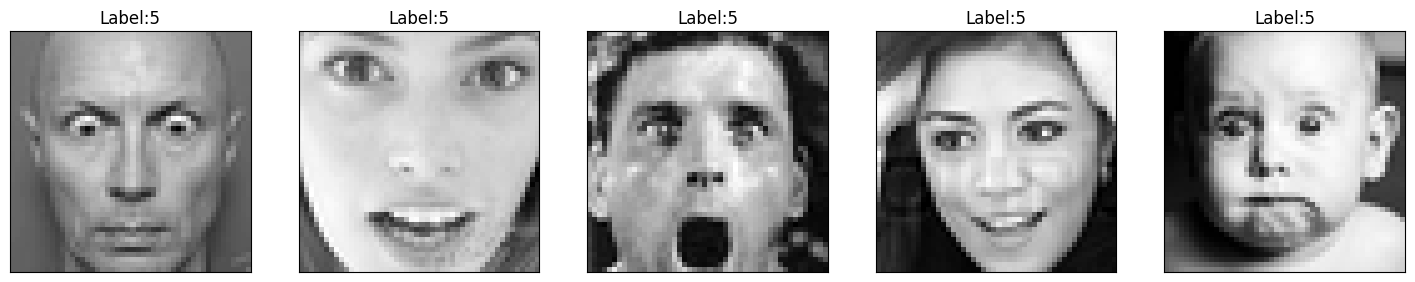

In [93]:
show_img_label(images, labels, target_label=5)

* Status: Neutral

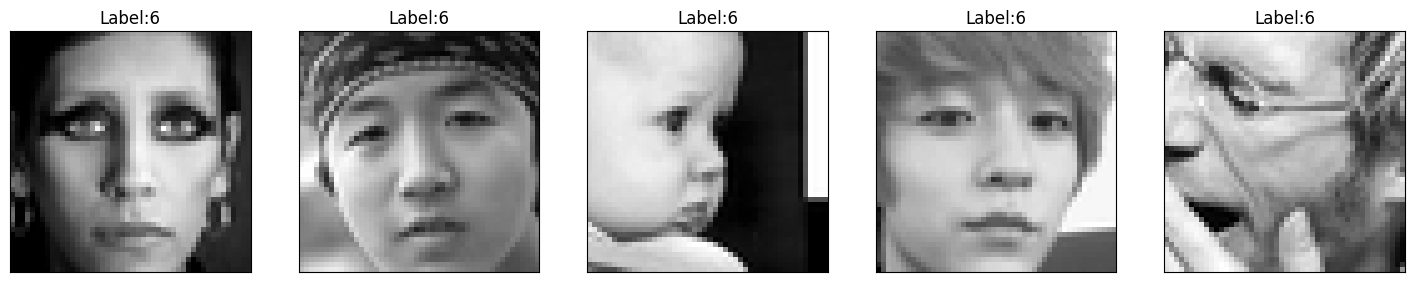

In [94]:
show_img_label(images, labels, target_label=6)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [95]:
from sklearn.preprocessing import StandardScaler


In [96]:
images.shape

(35887, 48, 48)

In [97]:
# Convert to a 2D array (number of samples, number of features)
images_reshaped = images.reshape(images.shape[0],images.shape[1]*images.shape[2])

In [98]:
images_reshaped.shape

(35887, 2304)

In [99]:
target = labels
target

array([0, 0, 2, ..., 0, 3, 2])

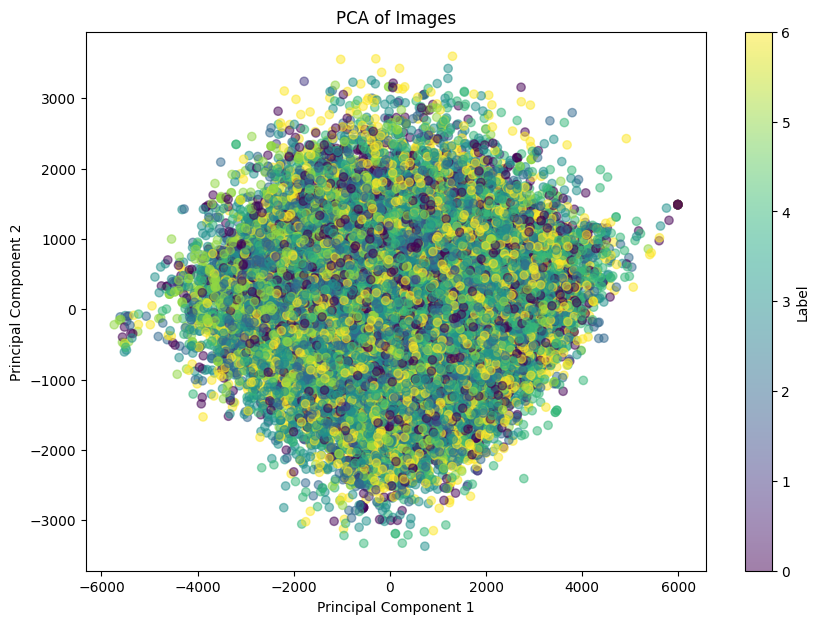

In [100]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
# pca.fit(images) ## modify images' array to the appropriate shape
images_pca = pca.fit_transform(images_reshaped)

labels = df1['emotion']
plt.figure(figsize=(10, 7))
scatter = plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Images')
plt.colorbar(scatter, label='Label')
plt.show()

* The PCA plot shows that the data is widely spread across the plane of the first two principal components.
* There are more data points in the center, indicating that many images have similar features.
* The data points are color-coded according to different expression labels, from 0 to 6. The color coding helps identify the distribution of expressions such as Angry, Disgust, Fear, Happy, Sad, Surprise, and Neutral.
* Even though there are some groups of similar colors, the expression labels overlap a lot. This means the first two principal components are not enough to fully separate the different expressions.
* To improve the classification of facial expressions, we may need to use more principal components or advanced methods like deep learning.


Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [101]:
from sklearn.decomposition import PCA, IncrementalPCA

In [102]:
# Fit the PCA on the dataset
pca = PCA()
pca.fit(images_reshaped)

PCA()

In [103]:
# Calculate the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

In [104]:
# Determine the number of components that explain 95% of the variance
k = np.argmax(var_cumu > 95)
print("Number of components explaining 95% variance: " + str(k))

Number of components explaining 95% variance: 254


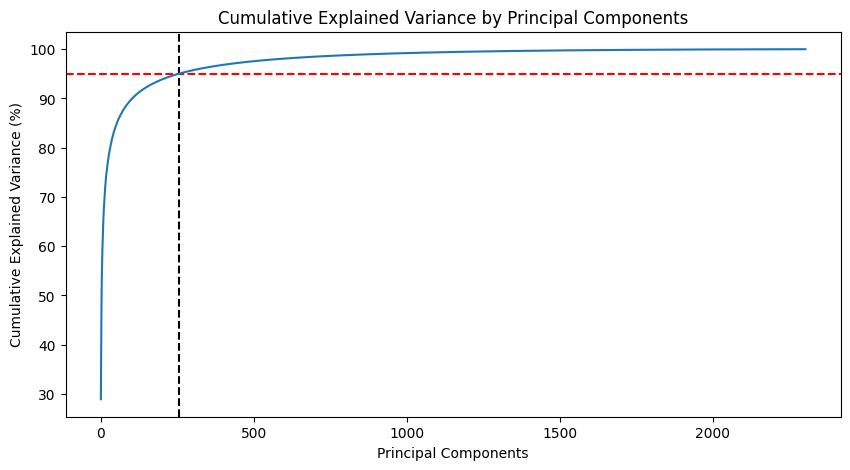

In [105]:
# Plot the cumulative explained variance
plt.figure(figsize=[10, 5])
plt.title('Cumulative Explained Variance by Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.xlabel('Principal Components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.plot(var_cumu)
plt.show()

Our team chooses the 95% threshold in Principal Component Analysis (PCA) is common for these reasons:
* 95% of the data's total variance is kept, ensuring important information is not lost.
* Reducing the number of dimensions makes the model easier to work with and understand.
* Components beyond 95% often contain more noise than useful information, so they can be excluded.
* Using fewer components helps the model generalize better to new data, avoiding overfitting.


## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

### MODELING

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [107]:
# images_pca=pca.transform(images) ## modify images' array to the appropriate shape
pca=PCA(n_components=255)
# pca.fit(images) ## modify images' array to the appropriate shape
images_pca = pca.fit_transform(images_reshaped)

In [108]:
## splitting data into train/val/test subsets here
X_train, X_temp, y_train, y_temp = train_test_split(images_pca, target, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0)
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (28709, 255)
X_val shape: (5383, 255)
X_test shape: (1795, 255)
y_train shape: (28709,)
y_val shape: (5383,)
y_test shape: (1795,)


> Navie Bayes

* Train model with dataset after PCA

In [109]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [110]:
def calculate_performance(y_true, y_pred):
    report = classification_report(y_true, y_pred)
    print("Classification report:\n", report)

In [111]:
# Compare on training dataset
nb_predY = nb_model.predict(X_test)
calculate_performance(y_test, nb_predY)

Classification report:
               precision    recall  f1-score   support

           0       0.18      0.06      0.09       234
           1       0.01      0.21      0.02        19
           2       0.21      0.39      0.27       276
           3       0.46      0.34      0.39       468
           4       0.31      0.10      0.15       310
           5       0.50      0.27      0.35       197
           6       0.28      0.33      0.31       291

    accuracy                           0.26      1795
   macro avg       0.28      0.24      0.23      1795
weighted avg       0.33      0.26      0.27      1795



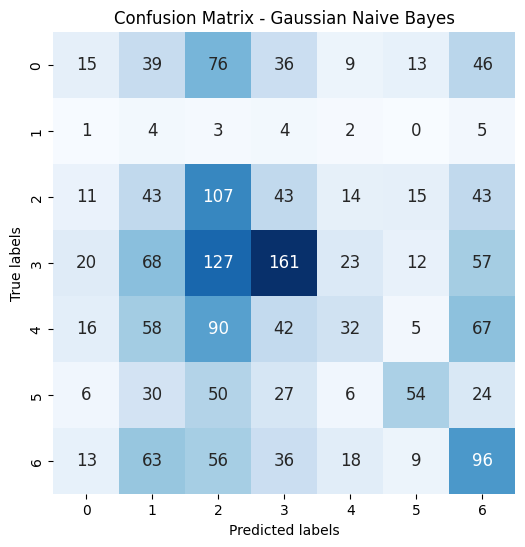

In [112]:
cm = confusion_matrix(y_test, nb_predY)
class_names = np.unique(y_test)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, square=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

In [113]:
# Evaluate the model on the validation set
predYval = nb_model.predict(X_val)
print("Validation Performance:")
calculate_performance(y_val, predYval)

Validation Performance:
Classification report:
               precision    recall  f1-score   support

           0       0.27      0.09      0.13       727
           1       0.04      0.47      0.08        87
           2       0.18      0.36      0.24       730
           3       0.45      0.36      0.40      1369
           4       0.35      0.12      0.18       951
           5       0.48      0.26      0.34       602
           6       0.28      0.29      0.29       917

    accuracy                           0.26      5383
   macro avg       0.29      0.28      0.24      5383
weighted avg       0.34      0.26      0.27      5383



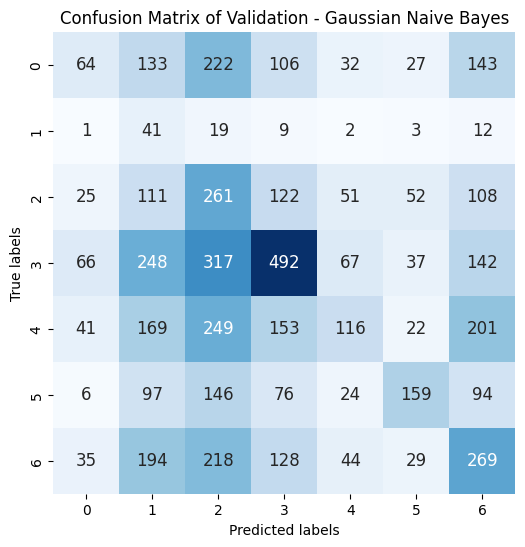

In [114]:
cm = confusion_matrix(y_val, predYval)
class_names = np.unique(y_val)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, square=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Validation - Gaussian Naive Bayes')
plt.show()

* Train modeling with data before PCA

In [115]:
## splitting data into train/val/test subsets here
Xtrain, Xtemp, ytrain, ytemp = train_test_split(images_reshaped , target, test_size=0.2, random_state=0)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.25, random_state=0)
print("X_train shape:", Xtrain.shape)
print("X_val shape:", Xval.shape)
print("X_test shape:", Xtest.shape)
print("y_train shape:", ytrain.shape)
print("y_val shape:", yval.shape)
print("y_test shape:", ytest.shape)

X_train shape: (28709, 2304)
X_val shape: (5383, 2304)
X_test shape: (1795, 2304)
y_train shape: (28709,)
y_val shape: (5383,)
y_test shape: (1795,)


In [116]:
nb_model1 = GaussianNB()
nb_model1.fit(Xtrain, ytrain)

GaussianNB()

In [117]:
# Compare on training dataset
nbpredY = nb_model1.predict(Xtest)
calculate_performance(ytest, nbpredY)

Classification report:
               precision    recall  f1-score   support

           0       0.22      0.06      0.09       234
           1       0.02      0.21      0.04        19
           2       0.24      0.07      0.11       276
           3       0.45      0.15      0.23       468
           4       0.23      0.38      0.29       310
           5       0.22      0.65      0.33       197
           6       0.23      0.15      0.18       291

    accuracy                           0.22      1795
   macro avg       0.23      0.24      0.18      1795
weighted avg       0.28      0.22      0.20      1795



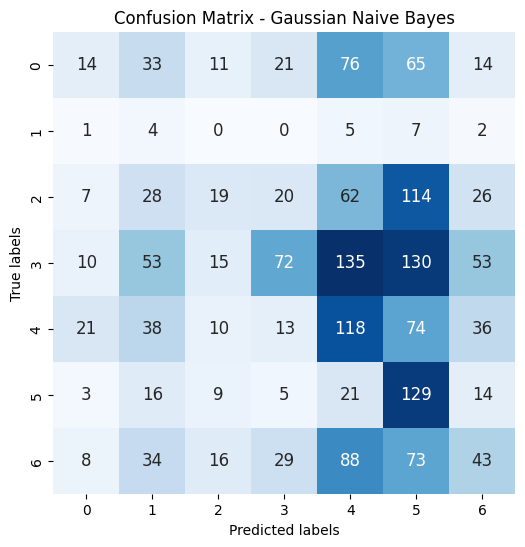

In [118]:
cm = confusion_matrix(ytest, nbpredY)
class_names = np.unique(ytest)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, square=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

In [119]:
# Evaluate the model on the validation set
predYval = nb_model1.predict(Xval)
print("Validation Performance:")
calculate_performance(yval, predYval)

Validation Performance:
Classification report:
               precision    recall  f1-score   support

           0       0.22      0.06      0.09       727
           1       0.03      0.21      0.05        87
           2       0.19      0.05      0.08       730
           3       0.40      0.15      0.22      1369
           4       0.27      0.42      0.33       951
           5       0.21      0.62      0.31       602
           6       0.25      0.15      0.19       917

    accuracy                           0.23      5383
   macro avg       0.22      0.24      0.18      5383
weighted avg       0.27      0.23      0.21      5383



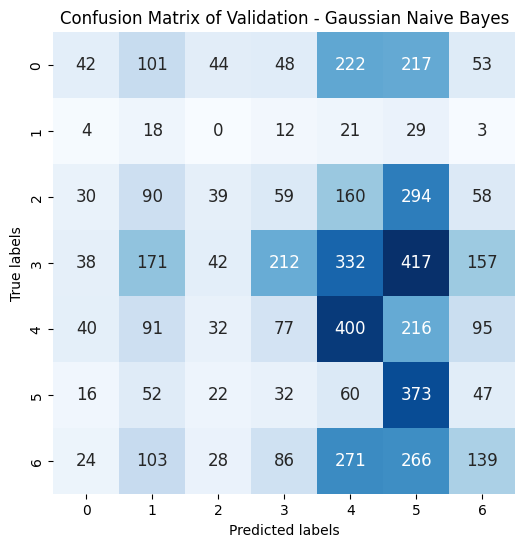

In [120]:
cm = confusion_matrix(yval, predYval)
class_names = np.unique(yval)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, square=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Validation - Gaussian Naive Bayes')
plt.show()

> XGBoost

* Train model with dataset after PCA

In [121]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=4,alpha = 10, learning_rate=1, objective='binary:logistic')
xgb_model.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [122]:
# Compare on training dataset
xgb_predY = xgb_model.predict(X_test)
calculate_performance(y_test, xgb_predY)

Classification report:
               precision    recall  f1-score   support

           0       0.29      0.25      0.27       234
           1       0.75      0.16      0.26        19
           2       0.32      0.26      0.29       276
           3       0.47      0.57      0.52       468
           4       0.31      0.32      0.31       310
           5       0.56      0.53      0.55       197
           6       0.33      0.33      0.33       291

    accuracy                           0.39      1795
   macro avg       0.43      0.35      0.36      1795
weighted avg       0.39      0.39      0.38      1795



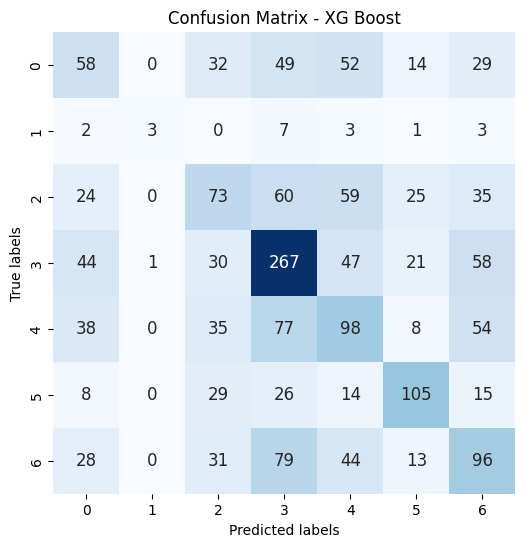

In [123]:
cm = confusion_matrix(y_test, xgb_predY)
class_names = np.unique(y_test)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, square=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XG Boost')
plt.show()

In [124]:
# Evaluate the model on the validation set
predY_val = xgb_model.predict(X_val)
print("Validation Performance:")
calculate_performance(y_val, predY_val)

Validation Performance:
Classification report:
               precision    recall  f1-score   support

           0       0.31      0.24      0.27       727
           1       0.76      0.22      0.34        87
           2       0.30      0.26      0.28       730
           3       0.49      0.61      0.54      1369
           4       0.33      0.32      0.32       951
           5       0.57      0.55      0.56       602
           6       0.36      0.37      0.36       917

    accuracy                           0.41      5383
   macro avg       0.44      0.37      0.38      5383
weighted avg       0.40      0.41      0.40      5383



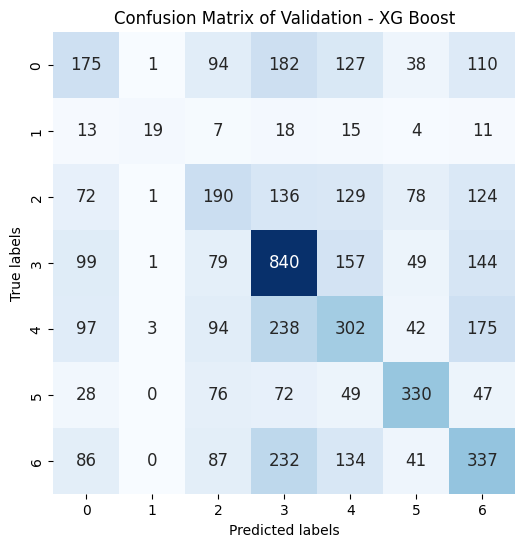

In [125]:
cm = confusion_matrix(y_val, predY_val)
class_names = np.unique(y_val)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, square=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Validation - XG Boost')
plt.show()

* Train model with data before PCA

In [126]:
xgb_model1 = XGBClassifier(n_estimators=100, max_depth=4,alpha = 10, learning_rate=1, objective='binary:logistic')
xgb_model1.fit(Xtrain, ytrain)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [127]:
xgbpredY = xgb_model1.predict(Xtest)
calculate_performance(ytest, xgbpredY)

Classification report:
               precision    recall  f1-score   support

           0       0.34      0.32      0.33       234
           1       1.00      0.11      0.19        19
           2       0.34      0.27      0.30       276
           3       0.55      0.66      0.60       468
           4       0.31      0.30      0.30       310
           5       0.69      0.65      0.67       197
           6       0.38      0.40      0.39       291

    accuracy                           0.44      1795
   macro avg       0.52      0.39      0.40      1795
weighted avg       0.44      0.44      0.44      1795



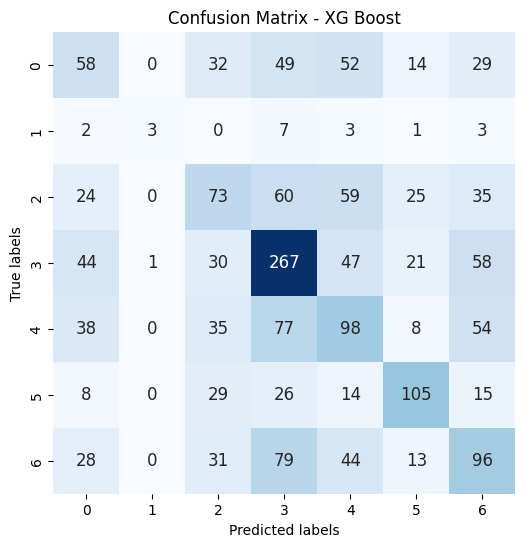

In [128]:
cm = confusion_matrix(y_test, xgb_predY)
class_names = np.unique(y_test)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, square=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XG Boost')
plt.show()

In [129]:
# Evaluate the model on the validation set
predYval = xgb_model1.predict(Xval)
print("Validation Performance:")
calculate_performance(yval, predYval)

Validation Performance:
Classification report:
               precision    recall  f1-score   support

           0       0.34      0.28      0.31       727
           1       0.80      0.23      0.36        87
           2       0.35      0.31      0.33       730
           3       0.56      0.65      0.60      1369
           4       0.35      0.35      0.35       951
           5       0.63      0.60      0.62       602
           6       0.40      0.44      0.42       917

    accuracy                           0.45      5383
   macro avg       0.49      0.41      0.43      5383
weighted avg       0.45      0.45      0.45      5383



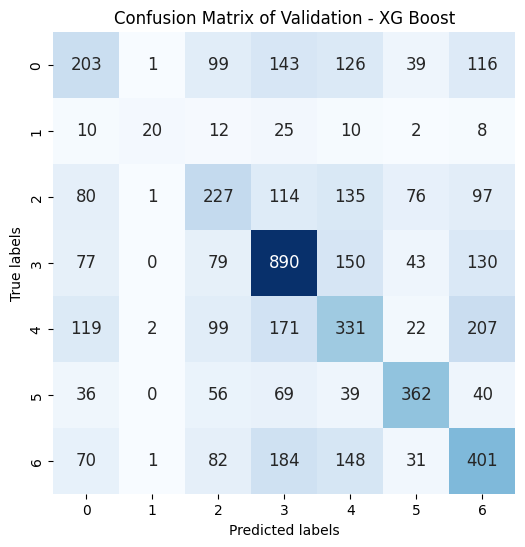

In [130]:
cm = confusion_matrix(yval, predYval)
class_names = np.unique(yval)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, square=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Validation - XG Boost')
plt.show()

* MLP

In [131]:
import keras
from keras import layers

In [132]:
model_mlp = keras.Sequential()
model_mlp.add(layers.Dense(units=120, activation='relu', input_shape=(2304,)))
model_mlp.add(layers.Dense(units=84, activation='relu'))
model_mlp.add(layers.Dense(units=7, activation='softmax'))

model_mlp.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
                  optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
                  metrics=['accuracy'])

model_mlp.summary()

c:\Users\levob\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 120)            │       276,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 7)              │           595 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 287,359 (1.10 MB)

 Trainable params: 287,359 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [133]:
# Training the Model with data before PCA
history = model_mlp.fit(Xtrain, ytrain, 
                        epochs=50, 
                        batch_size=32, 
                        validation_data=(Xval, yval))

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2157 - loss: 33.6666 - val_accuracy: 0.2374 - val_loss: 5.0222
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2428 - loss: 3.5590 - val_accuracy: 0.2339 - val_loss: 2.3714
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2862 - loss: 1.9593 - val_accuracy: 0.2621 - val_loss: 1.8039
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2810 - loss: 1.9034 - val_accuracy: 0.2788 - val_loss: 1.9824
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2755 - loss: 1.9239 - val_accuracy: 0.2731 - val_loss: 1.9070
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2501 - loss: 1.8416 - val_accuracy: 0.2562 - val_loss: 1.8115
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2490 - loss: 1.8092 - val_accuracy: 0.2543 - val_loss: 1.8129
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2486 - loss: 1.8120 - val_accuracy: 0

In [134]:
# Evaluating the Model
test_loss, test_acc = model_mlp.evaluate(Xtest, ytest, verbose=2)
print("\nTest accuracy:", test_acc)

57/57 - 0s - 2ms/step - accuracy: 0.2607 - loss: 1.7963

Test accuracy: 0.2607242465019226


* Training the model MLP with dataset after PCA

In [135]:
# Model MLP
model_mlp1 = keras.Sequential()
model_mlp1.add(layers.Dense(units=120, activation='relu', input_shape=(255,)))  # Đầu vào là số thành phần PCA
model_mlp1.add(layers.Dense(units=84, activation='relu'))
model_mlp1.add(layers.Dense(units=7, activation='softmax'))

model_mlp1.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
                  optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
                  metrics=['accuracy'])

model_mlp1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 120)            │        30,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 7)              │           595 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,479 (162.03 KB)

 Trainable params: 41,479 (162.03 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
# Training the Model
history1 = model_mlp1.fit(X_train, y_train, 
                        epochs=50, 
                        batch_size=32, 
                        validation_data=(X_val, y_val))

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2244 - loss: 39.0465 - val_accuracy: 0.2547 - val_loss: 1.9779
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2568 - loss: 1.8668 - val_accuracy: 0.2551 - val_loss: 1.8882
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2582 - loss: 1.7948 - val_accuracy: 0.2558 - val_loss: 1.8702
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2682 - loss: 1.7775 - val_accuracy: 0.2588 - val_loss: 1.8728
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2654 - loss: 1.7743 - val_accuracy: 0.2593 - val_loss: 1.8755
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2728 - loss: 1.7646 - val_accuracy: 0.2662 - val_loss: 1.8348
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2736 - loss: 1.7599 - val_accuracy: 0.2822 - val_loss: 1.7905
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2885 - loss: 1.7404 - val_accuracy: 0

In [137]:
# Evaluating the model MLP
test_loss, test_acc = model_mlp1.evaluate(X_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

57/57 - 0s - 1ms/step - accuracy: 0.3554 - loss: 2.0435

Test accuracy: 0.35543176531791687


* CNN Model with data before PCA

In [138]:
# Reshape the data back to (48, 48, 1)
images_reshaped = images_reshaped.reshape(-1, 48, 48, 1)

In [139]:
# Model CNN
model_cnn = keras.Sequential()
model_cnn.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model_cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(units=128, activation='relu'))
model_cnn.add(layers.Dense(units=64, activation='relu'))
model_cnn.add(layers.Dense(units=7, activation='softmax'))

model_cnn.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
                  optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
                  metrics=['accuracy'])
model_cnn.summary()

c:\Users\levob\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 846,855 (3.23 MB)

 Trainable params: 846,855 (3.23 MB)

 Non-trainable params: 0 (0.00 B)

In [140]:
# Splitting Data
Xtrain, Xtemp, ytrain, ytemp = train_test_split(images_reshaped, target, test_size=0.2, random_state=0)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.25, random_state=0)

In [141]:
# Training the Model
history = model_cnn.fit(Xtrain, ytrain, 
                        epochs=15, 
                        batch_size=32, 
                        validation_data=(Xval, yval))

Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.2778 - loss: 3.4132 - val_accuracy: 0.3940 - val_loss: 1.5556
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.4237 - loss: 1.4975 - val_accuracy: 0.4184 - val_loss: 1.5097
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.4826 - loss: 1.3519 - val_accuracy: 0.4629 - val_loss: 1.4283
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.5494 - loss: 1.1912 - val_accuracy: 0.4765 - val_loss: 1.3953
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.6084 - loss: 1.0446 - val_accuracy: 0.4800 - val_loss: 1.4741
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.6763 - loss: 0.8695 - val_accuracy: 0.4995 - val_loss: 1.6124
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.7401 - loss: 0.7121 - val_accuracy: 0.4876 - val_loss: 1.7817
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.7970 - loss: 0.5585 - 

In [142]:
# Evaluating the Model
test_loss, test_acc = model_cnn.evaluate(Xtest, ytest, verbose=2)
print("\nTest accuracy:", test_acc)

57/57 - 0s - 8ms/step - accuracy: 0.4540 - loss: 3.6600

Test accuracy: 0.4540390074253082


## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [143]:
## visualize the confusion matrices and classification reports here